In [34]:
#%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
import plotly.express as px

## Setting max displayed rows to 500, in order to display the full output of any command
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Setting to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.10f' % x)

# pour que les valeurs infinies soient considérées aussi comme des NaN :
pd.options.mode.use_inf_as_na = True



import sqlalchemy


# sklearn
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [2]:
# pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
# preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
# feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
# models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
# model selection
from sklearn.model_selection import RandomizedSearchCV
# scores
from sklearn.model_selection import cross_val_predict, cross_val_score
# load model
import joblib

# Interprétation des résultats de la modélisation
## Méthode
- Etape 1 --> Extraction des coefficients de la régression logistique (pas de p values disponibles dans SKlearn et complexité de les récupérer autrement compte tenu du prépro et de la régularisation)
- Etape 2 --> Identification des features entrant en jeu dans les composantes principales associées aux coefficients

## Résultats
- Les variables qualitatives sont supprimées du modèle par la régularisation
- Les coefficients les plus importants correspondent :
    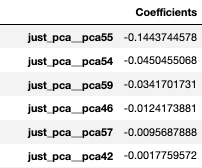
    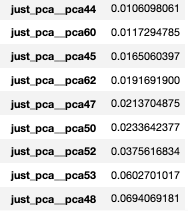
- Interprétation de la CP 55 (qui fait baisser la probabilité de défaillance) :
Pour résumer plus les coefficients de liquidité, de capacité de financement et de rentabilité sont élevés, et moins les charges d'emprunts pèsent, moins l'entreprise a de chances de faire faillite.
    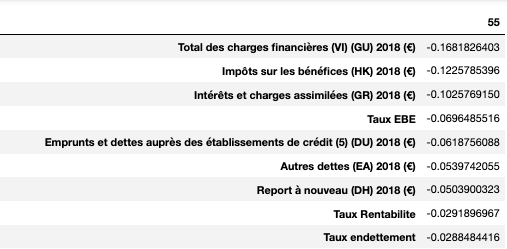
    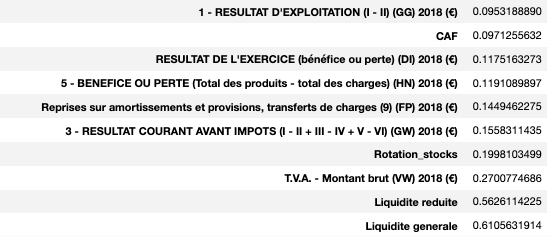

- Interprétation de la CP 48 (qui fait augmenter la probabilité de défaillance) :
Plus le report à nouveau est petit, plus les produits et charges exceptionnels sont importants, plus le poids des stocks et les dettes de TVA sont pesants plus les risques de faire faillite s'accroissent
    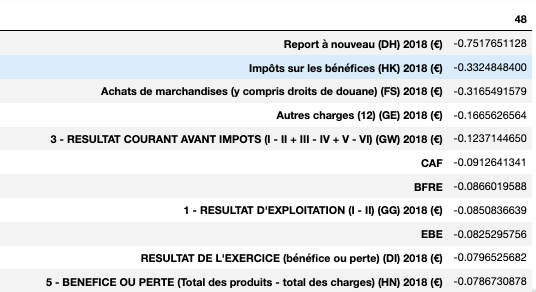
    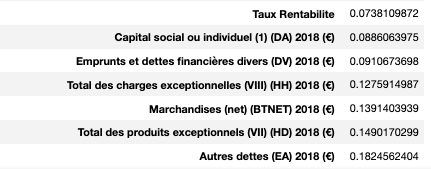

## Mise en oeuvre
### Coefficients de la régression logistique

In [3]:
model = joblib.load("fail_pred_model.joblib")

In [4]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Catégorie juridique '
                                                   '(Niveau II)',
                                                   'a_21']),
                                                 ('just_pca',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('robustscaler',
                                                                   RobustScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=6...
                                                  Index(['Capital souscrit non appelé (I) (AA) 2018 (€)', 'TOTAL (II) (net) (BJNET) 2018 (€)', 'Matières premières, approvisionnements (net) (BLNET) 2018 (€)', 'En cours de production de biens (net) (BNNET) 2018 (€)', 'En cours de production de services (net) (BPNET) 2018 (€)', 'Produits intermédiaires et finis (net) (BRNET) 2018 (€)', 'Marchandises (net) (BTNET) 2018 (€)', 'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)', 'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)', 'Autres créances (3) (net) (BZNET) 2018 (€)',
       ...
       'Rentabilite des capitaux propres', 'Autonomie financiere', 'Poids interets', 'Taux EBE', 'Taux VA', 'Taux Rentabilite', 'Poids dettes fiscales', 'Tresorerie', 'Taux augmentation endettement CT', 'Age entreprise'], dtype='object', length=112))])),
                ('logisticregression',
                 LogisticRegression(C=0.005, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [8]:
# colonnes utilisées par la régression logistique
feature_names = model[:-1].get_feature_names_out()
feature_names

array(['pipe_cat__Catégorie juridique (Niveau II)_Autre personne morale de droit privé',
       'pipe_cat__Catégorie juridique (Niveau II)_Entrepreneur individuel',
       "pipe_cat__Catégorie juridique (Niveau II)_Société anonyme à conseil d'administration",
       'pipe_cat__Catégorie juridique (Niveau II)_Société anonyme à directoire',
       'pipe_cat__Catégorie juridique (Niveau II)_Société civile',
       'pipe_cat__Catégorie juridique (Niveau II)_Société coopérative agricole',
       'pipe_cat__Catégorie juridique (Niveau II)_Société en commandite',
       'pipe_cat__Catégorie juridique (Niveau II)_Société en nom collectif',
       'pipe_cat__Catégorie juridique (Niveau II)_Société par actions simplifiée',
       'pipe_cat__Catégorie juridique (Niveau II)_Société à responsabilité limitée (SARL)',
       'pipe_cat__a_21_A', 'pipe_cat__a_21_B', 'pipe_cat__a_21_C',
       'pipe_cat__a_21_D', 'pipe_cat__a_21_E', 'pipe_cat__a_21_F',
       'pipe_cat__a_21_G', 'pipe_cat__a_21_H', 'pip

In [106]:
# coefficients de la régression logistique
coefs = pd.DataFrame(
    model[-1].coef_.transpose(),
    columns=["Coefficients"],
    index=feature_names,
)

In [31]:
coefs.sort_values(by="Coefficients")

,Coefficients
just_pca__pca55,-0.1443744578
just_pca__pca54,-0.0450455068
just_pca__pca59,-0.0341701731
just_pca__pca46,-0.0124173881
just_pca__pca57,-0.0095687888
just_pca__pca42,-0.0017759572
just_pca__pca40,-0.0015547464
just_pca__pca43,-0.0001900851
just_pca__pca37,-0.0001768885
just_pca__pca36,-0.0000703475


<AxesSubplot:>

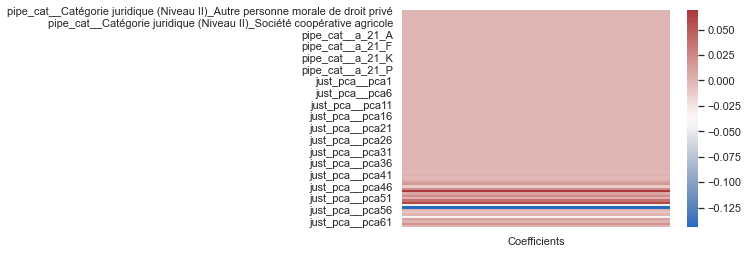

In [38]:
sns.heatmap(data=coefs, cmap="vlag", figsize)

### Pondération des features dans les composantes principales

In [91]:
# colonnes utilisées par la pca
original_features = model['columntransformer'].named_transformers_['just_pca'].feature_names_in_
original_features

array(['Capital souscrit non appelé (I) (AA) 2018 (€)',
       'TOTAL (II) (net) (BJNET) 2018 (€)',
       'Matières premières, approvisionnements (net) (BLNET) 2018 (€)',
       'En cours de production de biens (net) (BNNET) 2018 (€)',
       'En cours de production de services (net) (BPNET) 2018 (€)',
       'Produits intermédiaires et finis (net) (BRNET) 2018 (€)',
       'Marchandises (net) (BTNET) 2018 (€)',
       'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)',
       'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)',
       'Autres créances (3) (net) (BZNET) 2018 (€)',
       'Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)',
       'Valeurs mobilières de placement (net) (CDNET) 2018 (€)',
       'Disponibilités (net) (CFNET) 2018 (€)',
       "Charges constatées d'avance (3) (net) (CHNET) 2018 (€)",
       'TOTAL (III) (net) (CJNET) 2018 (€)',
       'Primes de remboursement des obligations (CM) 2018 (€)',
       'Ecarts de conversion act

In [85]:
# accéder aux composantes principales de la PCA :
pca_components = model['columntransformer'].named_transformers_['just_pca'].named_steps['pca'].components_
pca_components

array([[-2.04108706e-07,  7.91133148e-07,  2.37017082e-05, ...,
         7.46573945e-07, -0.00000000e+00,  1.30352864e-07],
       [-8.27338219e-06,  3.51055412e-06,  2.36406936e-06, ...,
         1.30631796e-06, -0.00000000e+00,  3.78113587e-07],
       [-6.67010960e-06,  1.31149104e-06,  3.52019748e-05, ...,
         1.25789190e-06,  0.00000000e+00,  4.42356953e-07],
       ...,
       [ 1.62109497e-06, -1.27850449e-01, -1.52905715e-02, ...,
        -1.48840677e-01,  0.00000000e+00, -5.13903099e-04],
       [-7.06958700e-06,  3.61546032e-02, -5.17688979e-02, ...,
         4.51452106e-02, -0.00000000e+00,  5.04440423e-03],
       [-2.93723295e-05, -2.27571353e-02, -2.55903622e-02, ...,
        -3.73553515e-02, -0.00000000e+00,  2.93719662e-03]])

In [92]:
pca_analysis = pd.DataFrame(pca_components, columns=original_features)

In [93]:
pca_analysis

,Capital souscrit non appelé (I) (AA) 2018 (€),TOTAL (II) (net) (BJNET) 2018 (€),"Matières premières, approvisionnements (net) (BLNET) 2018 (€)",En cours de production de biens (net) (BNNET) 2018 (€),En cours de production de services (net) (BPNET) 2018 (€),Produits intermédiaires et finis (net) (BRNET) 2018 (€),Marchandises (net) (BTNET) 2018 (€),Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€),Clients et comptes rattachés (3) (net) (BXNET) 2018 (€),Autres créances (3) (net) (BZNET) 2018 (€),"Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)",Valeurs mobilières de placement (net) (CDNET) 2018 (€),Disponibilités (net) (CFNET) 2018 (€),Charges constatées d'avance (3) (net) (CHNET) 2018 (€),TOTAL (III) (net) (CJNET) 2018 (€),Primes de remboursement des obligations (CM) 2018 (€),Ecarts de conversion actif (CN) 2018 (€),TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€),Capital social ou individuel (1) (DA) 2018 (€),Report à nouveau (DH) 2018 (€),RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€),TOTAL (I) (DL) 2018 (€),TOTAL(II) (DO) 2018 (€),TOTAL (III) (DR) 2018 (€),Autres emprunts obligataires (DT) 2018 (€),Emprunts obligataires convertibles (DS) 2018 (€),Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€),Emprunts et dettes financières divers (DV) 2018 (€),Avances et acomptes reçus sur commandes en cours (DW) 2018 (€),Dettes fournisseurs et comptes rattachés (DX) 2018 (€),Dettes fiscales et sociales (DY) 2018 (€),Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€),Autres dettes (EA) 2018 (€),dont comptes courants d'associés de l'exercice N (EA2) 2018 (€),Produits constatés d'avance (EB) 2018 (€),TOTAL (IV) (EC) 2018 (€),TOTAL GENERAL (I à V) (EE) 2018 (€),"(5) Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)",Chiffre d'affaires net (France) (FJ) 2018 (€),Chiffre d'affaires net (Exportations et livraisons intracommunautaires) (FK) 2018 (€),Chiffre d'affaires net (Total) (FL) 2018 (€),Subventions d'exploitation (FO) 2018 (€),"Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€)",Total des produits d'exploitation (2) (I) (FR) 2018 (€),Achats de marchandises (y compris droits de douane) (FS) 2018 (€),Variation de stock (marchandises) (FT) 2018 (€),Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€),Variation de stock (matières premières et approvisionnements) (FV) 2018 (€),Autres achats et charges externes (3) (6 bis) (FW) 2018 (€),"Impôts, taxes et versements assimilés (FX) 2018 (€)",Salaires et traitements (FY) 2018 (€),Charges sociales (10) (FZ) 2018 (€),Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€),Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€),Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€),Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€),Autres charges (12) (GE) 2018 (€),Total des charges d'exploitation (4) (II) (GF) 2018 (€),1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€),Total des produits financiers (V) (GP) 2018 (€),Intérêts et charges assimilées (GR) 2018 (€),Total des charges financières (VI) (GU) 2018 (€),Dotations financières aux amortissements et provisions (GQ) 2018 (€),Reprises sur provisions & transferts de charges (GM) 2018 (€),Total des produits exceptionnels (VII) (HD) 2018 (€),Reprises sur provisions & transferts de charges (HC) 2018 (€),Dotations exceptionnelles aux amortissements et provisions (6 ter) (HG) 2018 (€),Total des charges exceptionnelles (VIII) (HH) 2018 (€),4 - RESULTAT EXCEPTIONNEL (VII - VIII) (HI) 2018 (€),5 - BENEFICE OU PERTE (Total des produits - total des charges) (HN) 2018 (€),Participation des salariés aux résultats de l'entreprise (HJ) 2018 (€),Impôts sur les bénéfices (HK) 2018 (€),Clients douteux ou litigieux - Montant brut (VA) 2018 (€),Sécurité soc

In [113]:
pca_55 = pd.DataFrame(pca_analysis.iloc[55])
pca_55.sort_values(by=55)

,55
Total des charges financières (VI) (GU) 2018 (€),-0.1681826403
Impôts sur les bénéfices (HK) 2018 (€),-0.1225785396
Intérêts et charges assimilées (GR) 2018 (€),-0.1025769150
Taux EBE,-0.0696485516
Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€),-0.0618756088
Autres dettes (EA) 2018 (€),-0.0539742055
Report à nouveau (DH) 2018 (€),-0.0503900323
Taux Rentabilite,-0.0291896967
Taux endettement,-0.0288484416
"Matières premières, approvisionnements (net) (BLNET) 2018 (€)",-0.0189753023


In [114]:
pca_48 = pd.DataFrame(pca_analysis.iloc[48])
pca_48.sort_values(by=48)

,48
Report à nouveau (DH) 2018 (€),-0.7517651128
Impôts sur les bénéfices (HK) 2018 (€),-0.3324848400
Achats de marchandises (y compris droits de douane) (FS) 2018 (€),-0.3165491579
Autres charges (12) (GE) 2018 (€),-0.1665626564
3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€),-0.1237144650
CAF,-0.0912641341
BFRE,-0.0866019588
1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€),-0.0850836639
EBE,-0.0825295756
RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€),-0.0796525682


In [94]:
loadings = pca_components.T * np.sqrt(model['columntransformer'].named_transformers_['just_pca'].named_steps['pca'].explained_variance_)

In [100]:
loadings_df = pd.DataFrame(loadings.T, columns=original_features)
loadings_df

,Capital souscrit non appelé (I) (AA) 2018 (€),TOTAL (II) (net) (BJNET) 2018 (€),"Matières premières, approvisionnements (net) (BLNET) 2018 (€)",En cours de production de biens (net) (BNNET) 2018 (€),En cours de production de services (net) (BPNET) 2018 (€),Produits intermédiaires et finis (net) (BRNET) 2018 (€),Marchandises (net) (BTNET) 2018 (€),Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€),Clients et comptes rattachés (3) (net) (BXNET) 2018 (€),Autres créances (3) (net) (BZNET) 2018 (€),"Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)",Valeurs mobilières de placement (net) (CDNET) 2018 (€),Disponibilités (net) (CFNET) 2018 (€),Charges constatées d'avance (3) (net) (CHNET) 2018 (€),TOTAL (III) (net) (CJNET) 2018 (€),Primes de remboursement des obligations (CM) 2018 (€),Ecarts de conversion actif (CN) 2018 (€),TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€),Capital social ou individuel (1) (DA) 2018 (€),Report à nouveau (DH) 2018 (€),RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€),TOTAL (I) (DL) 2018 (€),TOTAL(II) (DO) 2018 (€),TOTAL (III) (DR) 2018 (€),Autres emprunts obligataires (DT) 2018 (€),Emprunts obligataires convertibles (DS) 2018 (€),Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€),Emprunts et dettes financières divers (DV) 2018 (€),Avances et acomptes reçus sur commandes en cours (DW) 2018 (€),Dettes fournisseurs et comptes rattachés (DX) 2018 (€),Dettes fiscales et sociales (DY) 2018 (€),Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€),Autres dettes (EA) 2018 (€),dont comptes courants d'associés de l'exercice N (EA2) 2018 (€),Produits constatés d'avance (EB) 2018 (€),TOTAL (IV) (EC) 2018 (€),TOTAL GENERAL (I à V) (EE) 2018 (€),"(5) Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)",Chiffre d'affaires net (France) (FJ) 2018 (€),Chiffre d'affaires net (Exportations et livraisons intracommunautaires) (FK) 2018 (€),Chiffre d'affaires net (Total) (FL) 2018 (€),Subventions d'exploitation (FO) 2018 (€),"Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€)",Total des produits d'exploitation (2) (I) (FR) 2018 (€),Achats de marchandises (y compris droits de douane) (FS) 2018 (€),Variation de stock (marchandises) (FT) 2018 (€),Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€),Variation de stock (matières premières et approvisionnements) (FV) 2018 (€),Autres achats et charges externes (3) (6 bis) (FW) 2018 (€),"Impôts, taxes et versements assimilés (FX) 2018 (€)",Salaires et traitements (FY) 2018 (€),Charges sociales (10) (FZ) 2018 (€),Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€),Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€),Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€),Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€),Autres charges (12) (GE) 2018 (€),Total des charges d'exploitation (4) (II) (GF) 2018 (€),1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€),Total des produits financiers (V) (GP) 2018 (€),Intérêts et charges assimilées (GR) 2018 (€),Total des charges financières (VI) (GU) 2018 (€),Dotations financières aux amortissements et provisions (GQ) 2018 (€),Reprises sur provisions & transferts de charges (GM) 2018 (€),Total des produits exceptionnels (VII) (HD) 2018 (€),Reprises sur provisions & transferts de charges (HC) 2018 (€),Dotations exceptionnelles aux amortissements et provisions (6 ter) (HG) 2018 (€),Total des charges exceptionnelles (VIII) (HH) 2018 (€),4 - RESULTAT EXCEPTIONNEL (VII - VIII) (HI) 2018 (€),5 - BENEFICE OU PERTE (Total des produits - total des charges) (HN) 2018 (€),Participation des salariés aux résultats de l'entreprise (HJ) 2018 (€),Impôts sur les bénéfices (HK) 2018 (€),Clients douteux ou litigieux - Montant brut (VA) 2018 (€),Sécurité soc

In [ ]:
# https://plotly.com/python/pca-visualization/
# A TESTER : biplot pour visualiser les features sur les composantes principales

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()